# EWD PROJEKT | Patryk Chodowiec s29054

# DATASET: KAGGLE | Spotify App Reviews
# Spotify app review data on Google Play Store in 2022

# The goal of the Data Science process is to develop a machine learning model that, based on reviews written by app users, will determine whether a comment is positive or negative, and thus whether the reviewer recommends the app.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
############################
# IMPORT OF LIBRARIES
############################

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
############################
# DATA LOAD
############################

path = '/content/drive/MyDrive/EWD/EWD_PROJEKT/spotify_reviews.csv' # path to file with review data
spotify_reviews = pd.read_csv(path)

spotify_reviews.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [ ]:
############################
# DATA VALIDATION
############################

spotify_reviews.isna().any()
# N/A values found in the Reply column

Time_submitted    False
Review            False
Rating            False
Total_thumbsup    False
Reply              True
dtype: bool

In [ ]:
spotify_reviews.isnull().sum()
# NULL values found in the Reply column

Time_submitted        0
Review                0
Rating                0
Total_thumbsup        0
Reply             61378
dtype: int64

In [ ]:
spotify_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


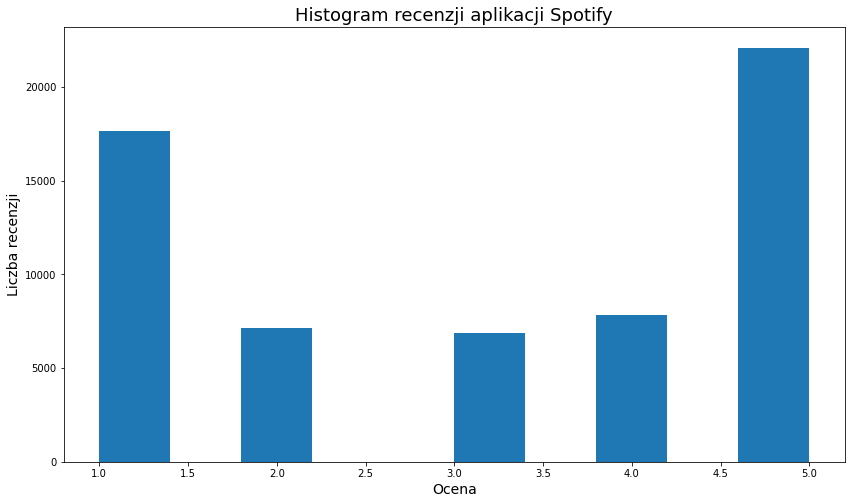

In [ ]:
plt.figure(figsize=(14,8))
plt.title('Spotify app review histogram', fontsize=18)
plt.hist(spotify_reviews['Rating'])
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Number of reviews', fontsize=14)
plt.show()

In [ ]:
############################
# DATA CLEANING
############################

# Columns regarding review submission time, review responses, or number of "thumbs up" are not needed, so we are removing them

cleaned_reviews = spotify_reviews.drop(['Time_submitted', 'Reply', 'Total_thumbsup'], axis=1)
cleaned_reviews.head()

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1


In [ ]:
############################
# ELIMINATION OF PUNCTUATION MARKS
############################

import string

# Use of the RegEx function
cleaned_reviews['Review']  = cleaned_reviews['Review'].str.replace(r'[^\w\s]+', '')
cleaned_reviews.head()

<ipython-input-40-e6a915d19c2a>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaned_reviews['Review']  = cleaned_reviews['Review'].str.replace(r'[^\w\s]+', '')


,Review,Rating
0,GREAT MUSIC SERVICE THE AUDIO IS HIGH QUALITY ...,POSITIVE
1,PLEASE IGNORE PREVIOUS NEGATIVE RATING THIS AP...,POSITIVE
2,THIS POPUP GET THE BEST SPOTIFY EXPERIENCE ON ...,POSITIVE
3,REALLY BUGGY AND TERRIBLE TO USE AS OF RECENTLY,NEGATIVE
4,DEAR SPOTIFY WHY DO I GET SONGS THAT I DIDNT P...,NEGATIVE


In [ ]:
############################
# ELIMINATION OF LOWERCASE LETTERS
############################

# Elimination of the distinction between lowercase and uppercase letters
cleaned_reviews['Review']  = cleaned_reviews['Review'].apply(lambda x: " ".join(x.upper() for x in x.split()))
cleaned_reviews.head()

,Review,Rating
0,GREAT MUSIC SERVICE THE AUDIO IS HIGH QUALITY ...,POSITIVE
1,PLEASE IGNORE PREVIOUS NEGATIVE RATING THIS AP...,POSITIVE
2,THIS POPUP GET THE BEST SPOTIFY EXPERIENCE ON ...,POSITIVE
3,REALLY BUGGY AND TERRIBLE TO USE AS OF RECENTLY,NEGATIVE
4,DEAR SPOTIFY WHY DO I GET SONGS THAT I DIDNT P...,NEGATIVE


In [ ]:
############################
# DATA TRANSFORMATION
############################

# Data should be changed from ratings on a scale of 1-5 to the "sentiment" of the review

def transform(rating):
    if rating > 3:
        return "POSITIVE"
    if rating == 3:
        return "NEUTRAL"
    if rating < 3:
        return "NEGATIVE"

cleaned_reviews['Rating'] = cleaned_reviews['Rating'].apply(transform)
cleaned_reviews.head()

,Review,Rating
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",POSITIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE


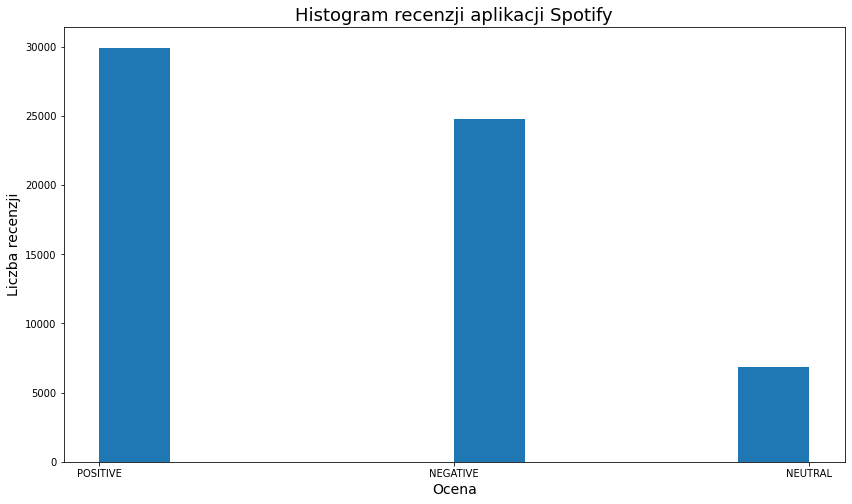

In [ ]:
plt.figure(figsize=(14,8))
plt.title('Spotify app review histogram', fontsize=18)
plt.hist(cleaned_reviews['Rating'])
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Number of reviews', fontsize=14)
plt.show()

In [ ]:
############################
# DIVISION INTO TEST AND TRAINING COLLECTION
############################

x = cleaned_reviews['Review']
y = cleaned_reviews['Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)

In [ ]:
############################
# Vectorization of review text
############################

vectorizer = CountVectorizer()
train_x_vectorized = vectorizer.fit_transform(x_train)

In [ ]:
print(x_train[0])
print(train_x_vectorized[0].toarray())

GREAT MUSIC SERVICE THE AUDIO IS HIGH QUALITY AND THE APP IS EASY TO USE ALSO VERY QUICK AND FRIENDLY SUPPORT
[[0 0 0 ... 0 0 0]]


In [ ]:
train_x_vectorized[0]

<1x25011 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [ ]:
test_x_vectorized = vectorizer.transform(x_test)

In [ ]:
############################
# Construction of Classifiers
############################

In [ ]:
############################
# Naive Bayes
############################

from sklearn.naive_bayes import MultinomialNB

clf_nb = MultinomialNB()
clf_nb.fit(train_x_vectorized, y_train)


MultinomialNB()

In [ ]:
############################
# Logistic regression
############################

from sklearn.linear_model import LogisticRegression

clf_logreg = LogisticRegression()
clf_logreg.fit(train_x_vectorized, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
############################
# Evaluation
############################

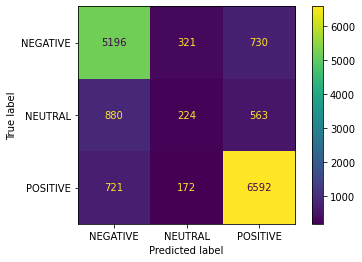

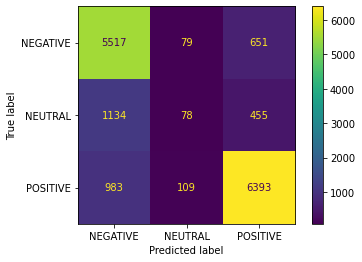

In [ ]:
############################
# Confusion Matrix
############################

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, clf_logreg.predict(test_x_vectorized), labels=clf_logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_logreg.classes_)
disp.plot()



cm = confusion_matrix(y_test, clf_nb.predict(test_x_vectorized), labels=clf_nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_nb.classes_)
disp.plot()

In [ ]:
############################
# Classification Report
############################

from sklearn.metrics import classification_report

print(classification_report(y_test, clf_logreg.predict(test_x_vectorized), labels=clf_logreg.classes_))
print(classification_report(y_test, clf_nb.predict(test_x_vectorized), labels=clf_nb.classes_))

              precision    recall  f1-score   support

    NEGATIVE       0.76      0.83      0.80      6247
     NEUTRAL       0.31      0.13      0.19      1667
    POSITIVE       0.84      0.88      0.86      7485

    accuracy                           0.78     15399
   macro avg       0.64      0.62      0.61     15399
weighted avg       0.75      0.78      0.76     15399

              precision    recall  f1-score   support

    NEGATIVE       0.72      0.88      0.79      6247
     NEUTRAL       0.29      0.05      0.08      1667
    POSITIVE       0.85      0.85      0.85      7485

    accuracy                           0.78     15399
   macro avg       0.62      0.59      0.58     15399
weighted avg       0.74      0.78      0.75     15399

